# Introduction

In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
from scipy import stats

from yf_helpers import get_dow_jones_indeces
from yf_helpers import yf_downloader
from yf_helpers import yf_reader


## Single Time Series Data

In [2]:
start = "-10y"
end = "2024-11-06"
ticker = "TSLA"
tsla_file = yf_downloader(ticker, start, end)

Data already exists


In [3]:
start_date = "2022-01-01"
end_date = "2024-11-01"
tsla = yf_reader(tsla_file, start_date, end_date).set_index("date")
tsla.tail()

,symbol,adjusted,close,high,low,open,volume
date,,,,,,,
2024-10-28,TSLA,262.510010,262.510010,273.540009,262.239990,270.000000,107653600.0
2024-10-29,TSLA,259.519989,259.519989,264.980011,255.509995,264.510010,80521800.0
2024-10-30,TSLA,257.549988,257.549988,263.350006,255.820007,258.040009,53993600.0
2024-10-31,TSLA,249.850006,249.850006,259.750000,249.250000,257.989990,66575300.0
2024-11-01,TSLA,248.979996,248.979996,254.000000,246.630005,252.039993,57544800.0


### Price-Volume Chart

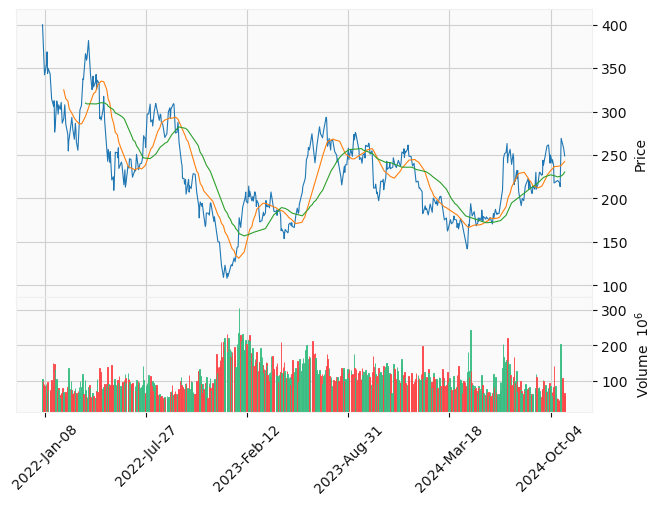

In [4]:
# The top plot consisting of dailing closing prices
mpf.plot(
    tsla, type="line", mav=(30, 60), volume=True, show_nontrading=True, style="yahoo"
)

### Candlestick Chart

In [5]:
tsla_2024 = yf_reader(tsla_file, "2024-07-01", end).set_index("date")
tsla_2024.tail()

,symbol,adjusted,close,high,low,open,volume
date,,,,,,,
2024-10-30,TSLA,257.549988,257.549988,263.350006,255.820007,258.040009,53993600.0
2024-10-31,TSLA,249.850006,249.850006,259.750000,249.250000,257.989990,66575300.0
2024-11-01,TSLA,248.979996,248.979996,254.000000,246.630005,252.039993,57544800.0
2024-11-04,TSLA,242.839996,242.839996,248.899994,238.880005,244.559998,68802400.0
2024-11-05,TSLA,251.440002,251.440002,255.279907,246.210098,247.399994,65759459.0


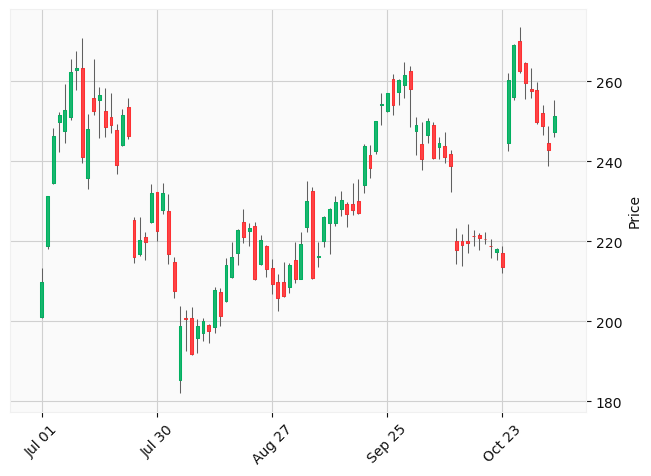

In [6]:
mpf.plot(tsla_2024, type="candle", style="yahoo")

### Plotting Returns

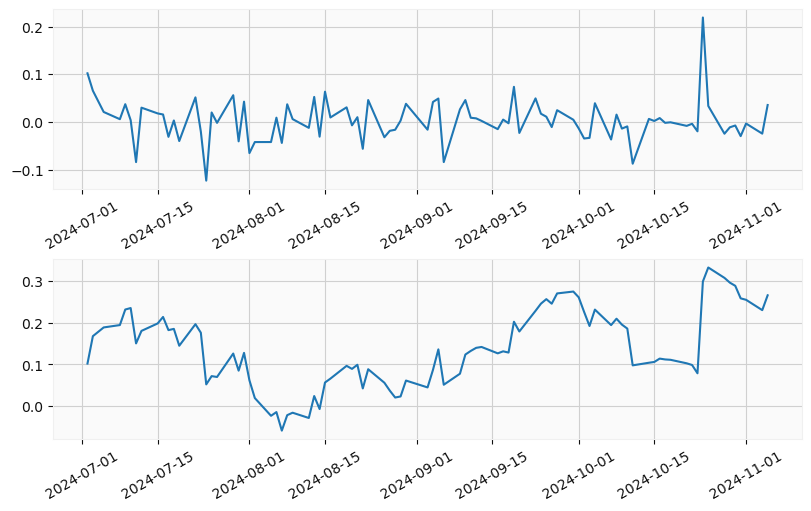

In [7]:
daily_changes = tsla_2024.close.pct_change(periods=1)
_, axes = plt.subplots(2, 1, figsize=(8, 5), constrained_layout=True)
axes[0].plot(daily_changes)
axes[1].plot(daily_changes.cumsum())
for ax in axes:
    labels = ax.get_xticklabels()
    for label in labels:
        label.set_rotation(30)

### Plotting Histograms

<Axes: >

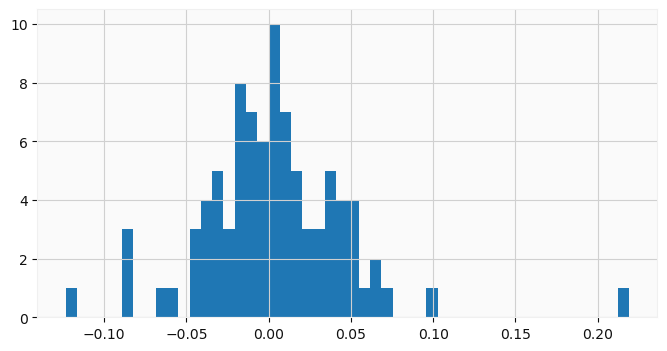

In [8]:
daily_changes.hist(bins=50, figsize=(8, 4))

### Plotting Volatility

<Axes: xlabel='date'>

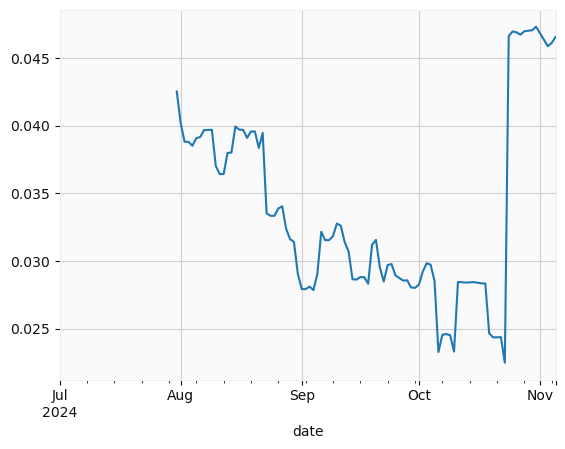

In [9]:
tsla_filled = tsla_2024.asfreq("D", method="ffill")
tsla_returns = tsla_filled.close.pct_change()
tsla_std = tsla_returns.rolling(window=30, min_periods=30).std()
tsla_std.plot()

### Q-Q Plot

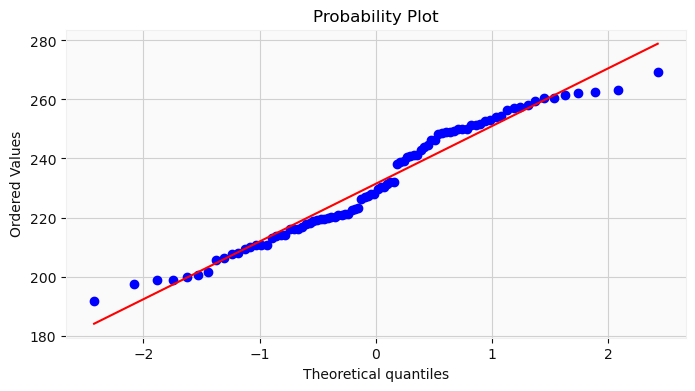

In [10]:
daily_changes = daily_changes.dropna()

_, ax = plt.subplots(figsize=(8, 4))
qq = stats.probplot(tsla_2024.close, dist="norm", plot=ax)

## Multiple Time Series Data

In [11]:
symbols = get_dow_jones_indeces()

In [12]:
symbols_file = yf_downloader(symbols, start="-10y", end=end)
symbols_df = yf_reader(symbols_file, start_date, end_date).set_index("date")
symbols_df.tail()

Data not exists, downloading to data/UNH-VZ[30]-20141106-20241106.csv


,symbol,adjusted,close,high,low,open,volume
date,,,,,,,
2024-11-01,TRV,245.639999,245.639999,248.970001,245.259995,246.580002,1450200.0
2024-11-01,UNH,567.559998,567.559998,570.330017,563.900024,565.119995,2548300.0
2024-11-01,V,290.188293,290.739990,292.670013,287.190002,288.489990,5470700.0
2024-11-01,VZ,41.360001,41.360001,42.349998,41.299999,42.119999,16682400.0
2024-11-01,WMT,82.190002,82.190002,82.529999,81.540001,82.529999,12181800.0


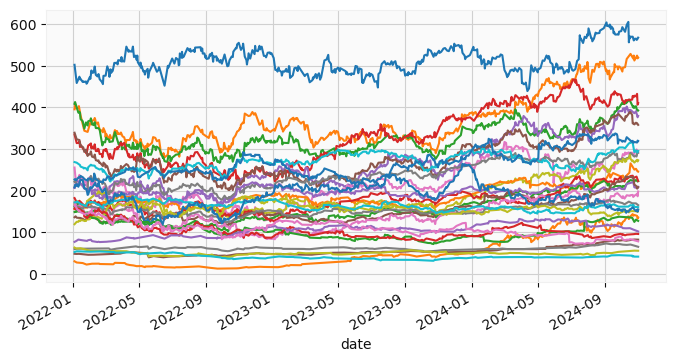

In [13]:
_, ax = plt.subplots(figsize=(8, 4))
for symbol in symbols:
    symbols_df.query(f"symbol == '{symbol}'").close.plot(ax=ax)

### Displaying the Correlation Matrix

In [14]:
corr_df = symbols_df.pivot_table(index="date", columns="symbol", values="close")
corr_df.head()

symbol,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,182.009995,226.690002,170.404495,168.210007,207.860001,207.000000,255.460007,63.160000,119.260002,156.759995,...,334.750000,164.669998,30.121000,162.899994,339.119995,155.750000,502.279999,221.429993,52.439999,48.216667
2022-01-04,179.699997,227.839996,167.522003,173.610001,213.630005,218.080002,248.229996,61.250000,121.430000,155.729996,...,329.010010,166.389999,29.290001,163.470001,335.720001,159.000000,490.899994,222.460007,53.470001,47.333332
2022-01-05,174.919998,225.139999,164.356995,171.759995,213.070007,219.750000,227.669998,60.279999,122.220001,155.190002,...,316.380005,162.250000,27.604000,164.210007,336.350006,159.770004,489.690002,220.000000,54.020000,47.973331
2022-01-06,172.000000,225.169998,163.253998,172.899994,211.339996,221.990005,229.149994,60.919998,123.260002,156.899994,...,313.880005,161.039993,28.177999,162.830002,333.559998,162.330002,469.649994,219.750000,53.759998,47.840000
2022-01-07,172.169998,227.289993,162.554001,174.380005,215.500000,224.190002,228.309998,61.130001,125.029999,157.830002,...,314.040009,156.970001,27.247000,162.740005,323.220001,166.240005,458.600006,216.960007,54.240002,48.296665


In [15]:
corr_df.pct_change().corr().head()

symbol,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.226586,0.565116,0.470190,0.393498,0.308970,0.515035,0.469348,0.200997,0.449662,...,0.686221,0.493740,0.563684,0.290771,0.395759,0.198284,0.236026,0.554762,0.179306,0.243664
AMGN,0.226586,1.000000,0.145064,0.211908,0.110957,0.229765,0.121690,0.268105,0.125789,0.158141,...,0.177757,0.160482,0.079953,0.284354,0.225874,0.222137,0.230803,0.224903,0.216375,0.202967
AMZN,0.565116,0.145064,1.000000,0.466890,0.387617,0.276933,0.576130,0.395543,0.175286,0.489985,...,0.685554,0.455525,0.560669,0.148658,0.369988,0.135203,0.110065,0.445935,0.110397,0.254997
AXP,0.470190,0.211908,0.466890,1.000000,0.462183,0.494071,0.414254,0.415627,0.287476,0.500814,...,0.448587,0.424518,0.426628,0.222306,0.422773,0.371166,0.222433,0.577185,0.195414,0.203068
BA,0.393498,0.110957,0.387617,0.462183,1.000000,0.383480,0.336201,0.289763,0.231300,0.394452,...,0.320919,0.384235,0.373679,0.122136,0.314177,0.228141,0.156202,0.332514,0.119706,0.145650


### Plotting Correlations

In [16]:
tesla_t = ["TSLA", "TM"]
start_date, end_date = "2021-01-01", "2024-11-06"
tt_file = yf_downloader(tesla_t, start="-5y", end=end)
tt_df = yf_reader(tt_file, start_date, end_date).set_index("date")
tt_df.tail()

Data already exists


,symbol,adjusted,close,high,low,open,volume
date,,,,,,,
2024-11-01,TSLA,248.979996,248.979996,254.000000,246.630005,252.039993,57544800.0
2024-11-04,TM,172.699997,172.699997,173.889999,172.289993,173.000000,253400.0
2024-11-04,TSLA,242.839996,242.839996,248.899994,238.880005,244.559998,68802400.0
2024-11-05,TM,174.729996,174.729996,174.809998,172.639999,173.009995,351100.0
2024-11-05,TSLA,251.440002,251.440002,255.279999,246.210007,247.339996,66787000.0


In [17]:
tt_df_filled = tt_df.pivot_table(index="date", columns="symbol", values="close").asfreq(
    "D", method="ffill"
)
tt_df_filled.head()

symbol,TM,TSLA
date,,
2021-01-04,153.289993,243.256668
2021-01-05,153.399994,245.036667
2021-01-06,153.529999,251.993332
2021-01-07,152.669998,272.013336
2021-01-08,152.850006,293.339996


<Axes: xlabel='date'>

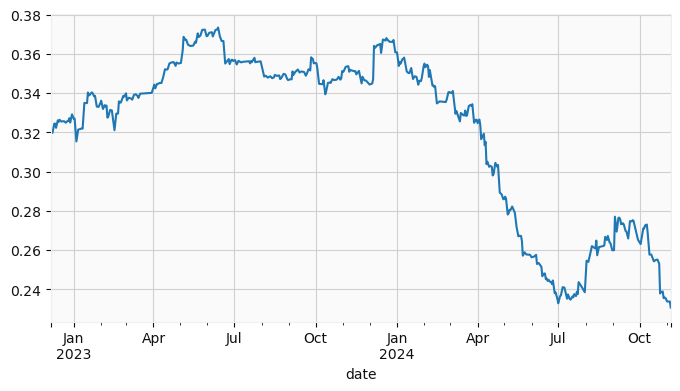

In [18]:
daily_changes = tt_df_filled.pct_change()
tesla_returns = daily_changes["TSLA"]
li_returns = daily_changes["TM"]
window = int(len(tt_df_filled.index) / 2)
df_corrs = (
    tesla_returns.rolling(window=window, min_periods=window)
    .corr(other=li_returns)
    .dropna()
)
df_corrs.plot(figsize=(8, 4))

### Simple Moving Averages

<Axes: xlabel='date'>

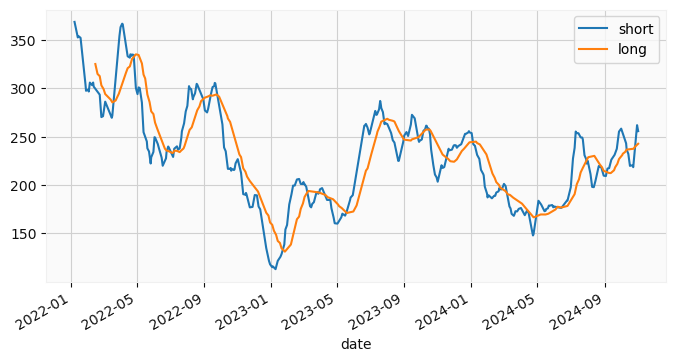

In [19]:
tsla_filled = tsla.asfreq("D", method="ffill")
tsla_last = tsla.close

series_short = tsla_last.rolling(window=5, min_periods=5).mean()
series_long = tsla_last.rolling(window=30, min_periods=30).mean()

tsla_sma = pd.DataFrame(columns=["short", "long"])
tsla_sma["short"] = series_short
tsla_sma["long"] = series_long
tsla_sma.plot(figsize=(8, 4))

### Exponential Moving Average

<Axes: xlabel='date'>

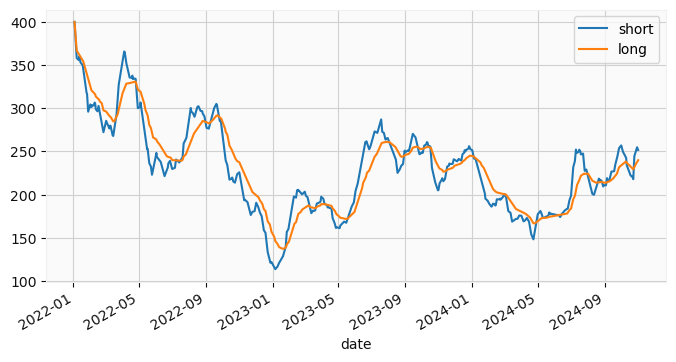

In [20]:
series_short = tsla_last.ewm(span=5).mean()
series_long = tsla_last.ewm(span=30).mean()

tsla_ema = pd.DataFrame(columns=["short", "long"])
tsla_ema["short"] = series_short
tsla_ema["long"] = series_long
tsla_ema.plot(figsize=(8, 4))